In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [12]:

class StrokeDatasetProcessor:
    def __init__(self, input_file, output_file):
        self.input_file = input_file
        self.output_file = output_file
        self.df = None
        self.X = None
        self.y = None
        self.resampled_df = None

    def load_data(self):
        self.df = pd.read_csv(self.input_file)
        print("Data loaded successfully.")
        print(f"Original dataset shape: {self.df.shape}")

    def explore_data(self):
        print("\nFirst 5 rows of the dataset:")
        print(self.df.head())
        print("\nDataset Info:")
        self.df.info()
        print("\nSummary Statistics:")
        print(self.df.describe())
        print("\nMissing values:")
        print(self.df.isnull().sum())

    def clean_data(self):
        self.df = self.df.dropna()
    
        self.df = self.df.replace([np.inf, -np.inf], np.nan).dropna()
        
        print("Data cleaned. New shape:", self.df.shape)

    def visualize_original_data(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.countplot(x='stroke', data=self.df)
        plt.title('Original Class Distribution')
        plt.subplot(1, 2, 2)
        sns.histplot(x='age', hue='stroke', data=self.df, kde=True)
        plt.title('Age Distribution by Stroke')
        plt.tight_layout()
        plt.show()

    def prepare_data_for_smote(self):
        self.X = self.df.drop(['stroke', 'id'], axis=1)
        self.y = self.df['stroke']
        self.X = pd.get_dummies(self.X, drop_first=True)
        print("Data prepared for SMOTE.")

    def apply_smote(self):
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(self.X, self.y)
        self.resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
        print(f"SMOTE applied. Resampled dataset shape: {self.resampled_df.shape}")

    def visualize_resampled_data(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.countplot(x='stroke', data=self.resampled_df)
        plt.title('Resampled Class Distribution')
        plt.subplot(1, 2, 2)
        sns.histplot(x='age', hue='stroke', data=self.resampled_df, kde=True)
        plt.title('Resampled Age Distribution by Stroke')
        plt.tight_layout()
        plt.show()

    def save_resampled_data(self):
        self.resampled_df.to_csv(self.output_file, index=False)
        print(f"Resampled dataset saved to {self.output_file}")

    def process(self):
        self.load_data()
        self.explore_data()
        self.clean_data()
        self.visualize_original_data()
        self.prepare_data_for_smote()
        self.apply_smote()
        self.visualize_resampled_data()
        self.save_resampled_data()


Data loaded successfully.
Original dataset shape: (5110, 12)

First 5 rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2

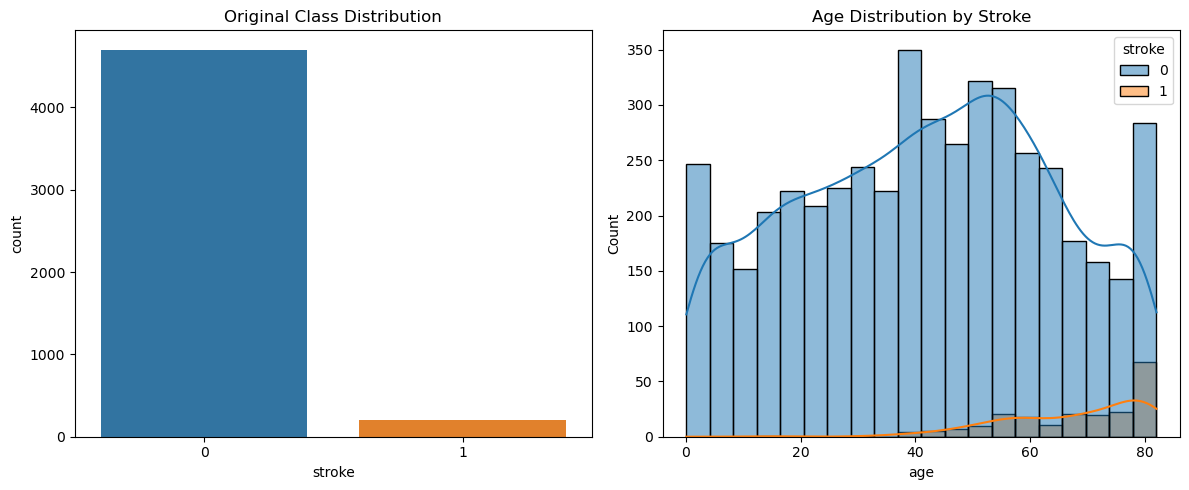

Data prepared for SMOTE.
SMOTE applied. Resampled dataset shape: (9400, 17)


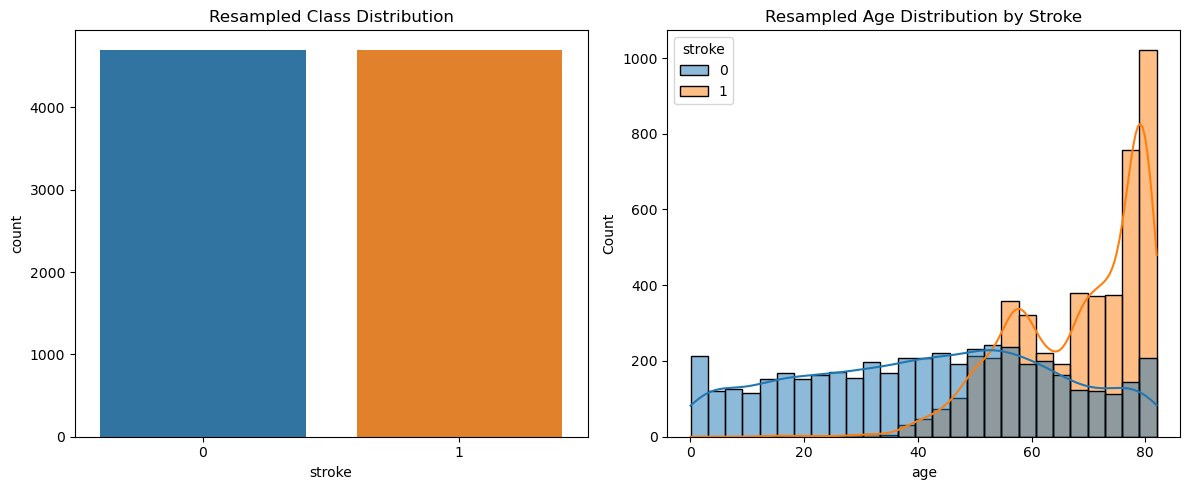

Resampled dataset saved to resampled-stroke-data.csv


In [13]:
processor = StrokeDatasetProcessor(
    input_file="healthcare-dataset-stroke-data.csv",
    output_file="resampled-stroke-data.csv"
)
processor.process()
